In [41]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import librosa
import torch
import torchaudio


from sklearn.preprocessing import LabelEncoder
print(torch.__version__)

2.0.1+cu118


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
filepath = "/content/drive/MyDrive/ML/IRMAS-TrainingData2/cel/0148__3.wav"
metadata = torchaudio.info(filepath)

In [4]:
print(metadata)

AudioMetaData(sample_rate=44100, num_frames=132299, num_channels=2, bits_per_sample=16, encoding=PCM_S)


#### Plot Waveform

In [5]:
# Plot the waveform
waveform, samplerate = torchaudio.load(filepath)
print(samplerate, waveform)

44100 tensor([[ 0.0332,  0.0314,  0.0295,  ...,  0.0446,  0.0466,  0.0496],
        [ 0.0365,  0.0380,  0.0389,  ..., -0.0179, -0.0173, -0.0154]])


In [6]:
def plot_waveform(filepath):
    waveform, samplerate = torchaudio.load(filepath)
    waveform = waveform.numpy()

    num_channels, num_frames = waveform.shape
    time_axis = torch.arange(0, num_frames) / samplerate

    figure, axes = plt.subplots(num_channels, 1)
    if num_channels == 1:
        axes = [axes]
    for c in range(num_channels):
        axes[c].plot(time_axis, waveform[c], linewidth=1)
        axes[c].grid(True)
        if num_channels > 1:
            axes[c].set_ylabel(f"Channel {c+1}")
    figure.suptitle("waveform")
    plt.show(block=False)

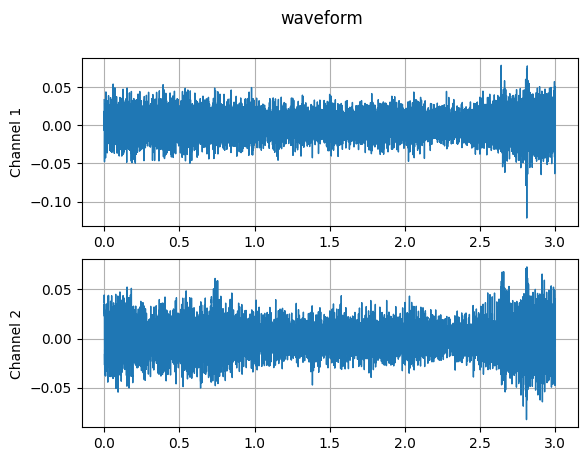

In [7]:
plot_waveform(filepath)

In [16]:
from IPython.display import Audio



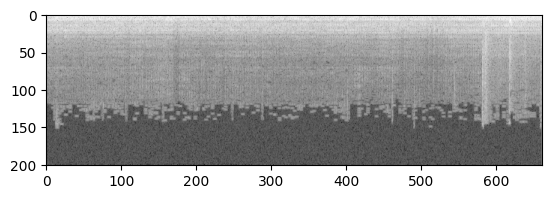

In [17]:
def plot_spectogram(filepath):
    waveform, samplerate = torchaudio.load(filepath)
    Audio(waveform.numpy()[0], rate=samplerate)
    audio_spectogram = torchaudio.transforms.Spectrogram()(waveform)
    plt.figure()
    plt.imshow(audio_spectogram.log2()[0,:,:].numpy(), cmap='gray')

plot_spectogram(filepath)

#### SciPy

In [ ]:
from scipy.io import wavfile

# Specify the path to your WAV file
file_path = 'path/to/your/file.wav'

# Read the WAV file
sample_rate, audio_data = wavfile.read(filepath)

# Print the sample rate and audio data
print(f"Sample rate: {sample_rate}")
print(f"Audio data: {audio_data}")


Sample rate: 44100
Audio data: [[ -545 -1263]
 [ -564 -1089]
 [ -528  -852]
 ...
 [-1328  -758]
 [-1142  -788]
 [-1221  -991]]


#### LibROSA

In [8]:
import librosa

In [9]:
audio_data, sample_rate = librosa.load(filepath)

In [10]:
# Print the sample rate and audio data
print(f"Sample rate: {sample_rate}")
print(f"Audio data: {audio_data}")

Sample rate: 22050
Audio data: [0.02580372 0.03687897 0.03083372 ... 0.00671704 0.01498099 0.01192832]


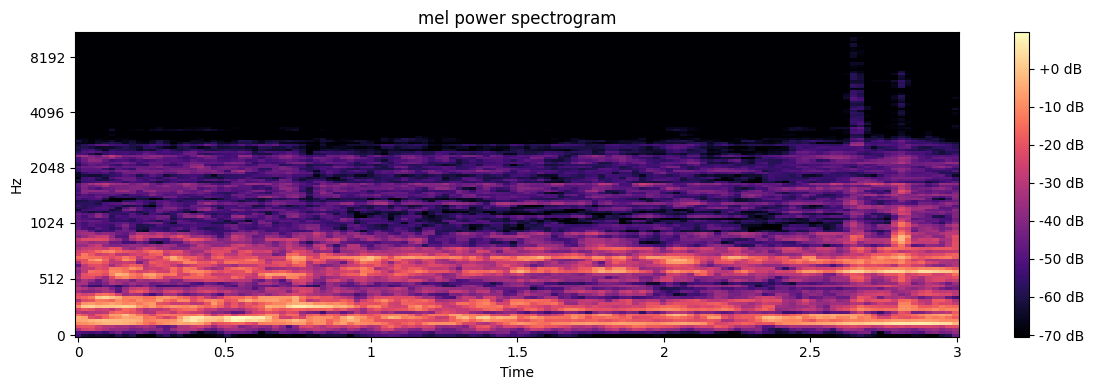

In [11]:
def plot_librosa(filepath):
    audio_data, sample_rate = librosa.load(filepath)
    S = librosa.feature.melspectrogram(y=audio_data, sr=sample_rate)
    log_S = librosa.amplitude_to_db(S)

    plt.figure(figsize=(12,4))
    librosa.display.specshow(log_S, sr=sample_rate, x_axis='time', y_axis='mel')


    plt.title('mel power spectrogram')
    # draw a color bar
    plt.colorbar(format='%+02.0f dB')
    plt.tight_layout()

plot_librosa(filepath)

In [12]:

X = librosa.stft(audio_data)
Xdb = librosa.amplitude_to_db(abs(X))
plt.figure(figsize=(14, 5))
#librosa.display.specshow(Xdb, sr=sample_rate, x_axis='time', y_axis='hz')
Xdb.shape

(1025, 130)

<Figure size 1400x500 with 0 Axes>

In [125]:
def get_mfcc(filepath):
    audio_data, sample_rate = librosa.load(filepath)
    S = librosa.feature.melspectrogram(y=audio_data, sr=sample_rate)
    log_S = librosa.amplitude_to_db(S, ref=np.max)
    MFCC = librosa.feature.mfcc(S=log_S, n_mfcc=23)
    # delta2_mfcc = librosa.feature.delta(MFCC, order=2)

    # Plot Graph
    # librosa.display.specshow(log_S)
    # plt.colorbar()
    # plt.tight_layout()
    return MFCC

mfcc = get_mfcc(filepath)
print(mfcc.shape)
mfcc

(23, 130)


array([[-7.1306982e+02, -6.8956683e+02, -6.8894269e+02, ...,
        -6.8621344e+02, -6.8163293e+02, -6.7137494e+02],
       [ 1.8366156e+02,  1.9566463e+02,  1.9547350e+02, ...,
         1.9695129e+02,  2.0013428e+02,  2.0693167e+02],
       [ 4.6809601e+01,  3.3732765e+01,  3.0609173e+01, ...,
         2.8135094e+01,  2.3664942e+01,  2.1288963e+01],
       ...,
       [-1.1916847e+01, -1.3014788e+01, -5.6023693e+00, ...,
        -1.7069504e+01, -1.5116104e+01, -1.8390354e+01],
       [-1.9471069e+01, -1.3845091e+01, -5.3250351e+00, ...,
        -1.6151001e+01, -9.5063238e+00, -1.2545955e+01],
       [-1.5270056e+01, -3.1525307e+00,  4.9287295e+00, ...,
        -2.3187180e+00,  4.2435384e-01,  1.2468338e-01]], dtype=float32)

In [75]:
originalpath = "/content/drive/MyDrive/ML/IRMAS-TrainingData2/"
def get_io(originalpath):
    df = pd.DataFrame(columns=["file", "label"])

    # Get the list of labels
    labels = os.listdir(originalpath)
    labels.sort()

    # Get each file path
    for label in labels:
        files = os.listdir(originalpath + label)
        files.sort()
        # Append each row to dataframe
        for file1 in files:
            df.loc[len(df.index)] = [originalpath + label + "/" + file1, label]
    return df

df1 = get_io(originalpath)
df1.shape

(6558, 2)

In [78]:
print(df1.describe())
df1['label'].unique()

                                                     file label
count                                                6558  6558
unique                                               6558    11
top     /content/drive/MyDrive/ML/IRMAS-TrainingData2/...   voi
freq                                                    1   778


array(['cel', 'cla', 'flu', 'gac', 'gel', 'org', 'pia', 'sax', 'tru',
       'vio', 'voi'], dtype=object)

In [79]:
df1.head()

,file,label
0,/content/drive/MyDrive/ML/IRMAS-TrainingData2/...,cel
1,/content/drive/MyDrive/ML/IRMAS-TrainingData2/...,cel
2,/content/drive/MyDrive/ML/IRMAS-TrainingData2/...,cel
3,/content/drive/MyDrive/ML/IRMAS-TrainingData2/...,cel
4,/content/drive/MyDrive/ML/IRMAS-TrainingData2/...,cel


In [111]:
X = []
y = []
for i in df1.index:
    file, label = df1.loc[i, "file"], df1.loc[i, "label"]

    X.append(get_mfcc(file))
    y.append(label)
    # takes 17 mins
    if (i % 500 == 0):
        print(i)
X = np.array(X)
print(X.shape)

0
500
1000
1500
2000
2500
3000
3500
4000
4500
5000
5500
6000
6500
(6558, 23, 130)


In [116]:
reshaped = X.reshape(X.shape[0], -1)
np.savetxt('data.csv', reshaped, delimiter=',')


In [119]:
arr = np.loadtxt("data.csv", delimiter=",")
arr = arr.reshape(X.shape[0], X.shape[1], X.shape[2])
print(arr.shape)

(6558, 23, 130)


In [120]:
if (X == arr).all():
    print("True")

True
